# Introduction

This project picks a single dataset, creates a deep learning network, and experiments a series of models and parameters for the network following the universal workflow of Deep Learning with Python (DLWP). My network model is for binary classification and is based on Supervised Learning method. The model predicts movie review whether it is positive or negative. To develop the network that solves the problem, I identified the International Movie Data Base (IMDB) dataset. I selected this dataset because if we can predict the binary labels for movie reviews, we can expand the research and application that predicts the labels for text in other fields such as sentiment analysis. I examined all the possible subjects thoroughly to find the best model, interpreted each result, and derived the conclusion with insights. My model will also help evaluate the potential improvement and reproducibility discussed in the conclusion section. 

# Methodology

To experiment with the training performance for the binary classification task in movie review prediction using the Supervised Learning method in Deep Learning, I implemented the following steps; I preprocessed the IMDB dataset, created the base model, and examined all relevant parameters to improve to the final model with the optimal parameters. Specifically, For the preprocessing part, to feed tensor input to the network, I used 10000 words from the IMDB dataset and encoded them into a one-hot vector with the binary floating values. For the examination part, I tested with hidden layers, hidden units, loss functions, activation functions, and learning rates using a temporary optimal epoch. I tuned the model with the optimal parameters to get the best network. This final network model is used to train on the complete training set for the binary classification task with the optimal epochs. The benefits of this experiment strategy are the robust network with improved binary classification performance, resulting in a better movie review prediction from the given review text.

# Model Examination

To build the best DL network that gives the best training results, I implemented the above methodology in this section. The examination experiments of a series of models and parameters, and their results are as follows. 

This section refers code from the lecture notebook 9.210 IMDB[1].

## Preprocess Dataset

Prepare functions for preprocessing: import the necessary libraries, download IMDB dataset, and preprocess the dataset for training using the specified words. 

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    """
    Vectorize sequences and create a one-hot vector.
    
    Parameters
    ----------
    sequences : ndarray
    (n, d) NumPy array contains n lists with d words in encoded value.
    
    dimension : int
    The number of dimention. Set 10000 by default.
    
    Return
    ----------
    (n, 10000) NumPy array contains n lists with 10000 dimentions of a one-hot vector.
    
    """  
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


def preprocess(num_of_words):
    """
    Preprocess dataset: load it, vectorize it, and split it.
    
    Parameters
    ----------
    num_of_words : int
    The number of words to be loaded from the dataset.
    
    Return
    ----------
    x_val : NumPy array of validation set for x. 
    partial_x_train : NumPy array of training set for x.
    y_val : NumPy array of validation set for y.
    partial_y_train : NumPy array of training set for y.
    x_test : NumPy array of test set for x.
    y_test : NumPy array of test set for y.
    
    """
    # load IMDB dataset with the specified words
    ((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = num_of_words)

    # preprocess with vectorizing
    x_train = vectorize_sequences(train_data, dimension = num_of_words)
    x_test = vectorize_sequences(test_data, dimension = num_of_words)

    y_train = np.asarray(train_labels).astype('float32')
    y_test = np.asarray(test_labels).astype('float32')
    
    # split data 
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]
    
    return x_val, partial_x_train, y_val, partial_y_train, x_test, y_test


Preprocess the dataset for training using 10000 words. 

In [3]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(10000)

17465344/17464789 [==============================] - 0s 0us/step


## Prepare helpers

They support plotting accuracy and loss.

In [2]:
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

def train(model, epochs, optimizer='rmsprop', loss='binary_crossentropy'):
    """
    Train the model with the specified parameters.
    
    Parameters
    ----------
    model : tensorflow.python.keras.engine.sequential.Sequential
    Tensorflow keras sequential model.
    
    epochs : int
    The number of epochs.
    
    optimizer : str
    The optimizer name. Set 'rmsprop' by default.
    
    loss : str
    The loss function name. Set 'binary_crossentropy' by default.
    
    Return : tensorflow.python.keras.callbacks.History
    ----------
    history : The training history.
    
    """  
    model.compile(optimizer, loss, metrics=['accuracy'])
    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = epochs,
                        batch_size=512,
                        verbose=0,
                        validation_data = (x_val, y_val)) 
    return history

def plot_accuracy(history):
    """
    Plot the history of accuracy.
    
    Parameters
    ----------
    history : tensorflow.python.keras.callbacks.History
    The training history.
    
    """  
    history_dict = history.history
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, acc, blue_dots, label = 'Training acc')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def plot_loss(history):
    """
    Plot the history of loss.
    
    Parameters
    ----------
    history : tensorflow.python.keras.callbacks.History
    The training history.
    
    """ 
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Build the base model

Base model uses 2 hidden layers, 16 units for each, relu activation, rmsprop optimizer, and binary crossentropy as loss function.

Max accuracy: 0.8883000016212463


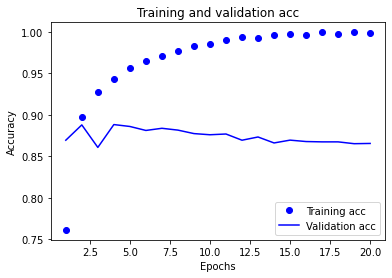

In [3]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, epochs=20)
print("Max accuracy:", max(history.history['val_accuracy']))

# plot training and validation accuracy against epochs
plot_accuracy(history)

## Find the optimal epoch

This optimal epoch will be used throughout the experiments follow. 

In [4]:
val_loss = history.history['val_loss']
optimal_epoch = np.argmin(val_loss)
print("Optimal epochs:", optimal_epoch)

Optimal epochs: 3


## Training and Validation Loss

Check training and validation loss for the base model. We can see that the validation loss starts increasing after the optimal epochs.

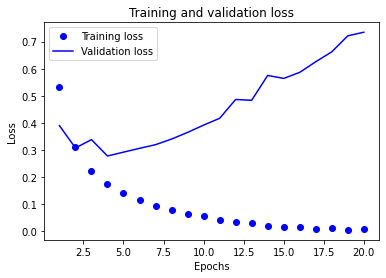

In [5]:
plot_loss(history)

# Results

## Experiment with Hidden Layers

Start experimenting with the optimal epochs, starting from 0 hidden layer.

In [34]:
model = models.Sequential()
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8521999716758728


1 hidden layer.

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8763999938964844


2 hidden layers.

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8873000144958496


3 hidden layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8720999956130981


## Hidden Layer Results

On average, 2 hidden layers tend to perform better for this network. Throughout 4 times of experiments, I cannot say which one always performs best, so I took average. 

|  Hidden layer  |  Accuracy1  |  Accuracy2  |  Accuracy3  |  Accuracy4  |  Average  |
| ---- | ---- | ---- | ---- | ---- | ---- |
|  0  |  0.8542  |  0.8554  |  0.8524  |  0.8521  |  0.8535  |
|  1  |  0.8750  |  0.8877  |  0.8917  |  0.8763  |  0.8826  |
|  2  |  0.8878  |  0.8899  |  0.8813  |  0.8873  |  0.8865  |
|  3  |  0.8820  |  0.8909  |  0.8924  |  0.8720  |  0.8843  |

## Experiment with hidden units

Use the optimal 2 hidden layers and experiment with 64 hidden units.

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8848000168800354


Experiment with 32 hidden units.

In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8776000142097473


Experiment with 16 hidden units.

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8891000151634216


## Hidden units results

16 hidden units tend to perform best for this network.

|  Hidden units  |  Accuracy1  |  Accuracy2  |  Accuracy3  |  Accuracy4  |  Average  |
| ---- | ---- | ---- | ---- | ---- | ---- |
|  16  |  0.8891  |  0.8883  |  0.8889  |  0.8863  |  0.8881  |
|  32  |  0.8776  |  0.8877  |  0.8842  |  0.8867  |  0.8840  |
|  64  |  0.8518  |  0.8244  |  0.8848  |  0.8808  |  0.8604  |

## Experiment with loss function

Use the optimal number of 16 hidden units with 2 hidden layers, investigate replacing the `binary_crossentropy` loss function with `mse`.

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, loss='mse')
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8809000253677368


In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, loss='binary_crossentropy')
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8888000249862671


## Loss function results

Throughout the 4 experiments, results vary and there is no significant difference between two loss functions on average.

|  Loss function  |  Accuracy1  |  Accuracy2  |  Accuracy3  |  Accuracy4  |  Average  |
| ---- | ---- | ---- | ---- | ---- | ---- |
|  binary_crossentropy  |  0.8888  |  0.8852  |  0.8906  |  0.8907  |  0.8888  |
|  mse  |  0.8809  |  0.8877  |  0.8909  |  0.8881  |  0.8869  |

## Experiment with activations 

Try `tanh` activation.

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8902999758720398


Try `relu` activation.

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8920999765396118


Try `sigmoid` activation.

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'sigmoid', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'sigmoid'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch)
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8608999848365784


## Activations results

Throughout 4 experiments, relu performed best for this network.

|  Activations  |  Accuracy1  |  Accuracy2  |  Accuracy3  |  Accuracy4  |  Average  |
| ---- | ---- | ---- | ---- | ---- | ---- |
|  relu  |  0.8830  |  0.8913  |  0.8919  |   0.8920  |   0.8895  | 
|  tanh  |  0.8805  |  0.8903  |  0.8877  |   0.8902  |   0.8871  | 
|  sigmoid  |  0.8560  |  0.8547  |  0.8597  |   0.8608  |   0.8578  |

## Experiment with learning rates

Use the optimal number of hidden layers, hidden units, and the bset activation, investigate the effect of different learning rates.

In [64]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8902999758720398


## Learning rates results

Throughout 4 experiments for the series of learning rates, 

- learning rate of 0.001 tends to perform best for this network.
- other learning rates under 0.01 also seem to be promising.
- performance starts decreasing and becoming unstable with the learning rates above 0.01 

|  Learning Rate  |  Accuracy1  |  Accuracy2  |  Accuracy3  |  Accuracy4  |  Average  |
| ---- | ---- | ---- | --- | --- | --- |
|  0.001  |  0.8924  |  0.8888  |  0.8856  |  0.8902  |  0.8892  |
|  0.005  |  0.8871  |  0.8862  |  0.8891  |  0.8816  |  0.886  |
|  0.007  |  0.8855  |  0.8848  |  0.8887  |  0.8841  |  0.8857  |
|  0.01  |  0.8799  |  0.8809  |  0.8858  |  0.8748  |  0.8803  |
|  0.015  |  0.8626  |  0.8842  |  0.8866  |  0.8819  |  0.8788  |
|  0.02  |  0.8481  |  0.8580  |  0.8518  |  0.8813  |  0.8598  |
|  0.03  |  0.8766  |  0.8834  |  0.8777  |  0.8841  |  0.8804  |

## Experiment with the number of words

Try changing the number of words to use for training and see if it affects the network performance. 
First, try with 10000 words.

In [19]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(10000)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8906999826431274


Try with 12500 words.

In [18]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(12500)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (12500,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8938999772071838


Try with 13500 words.

In [16]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(13500)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (13500,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8932999968528748


Try with 15000 words.

In [14]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(15000)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (15000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8920999765396118


Try with 20000 words.

In [11]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(20000)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (20000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8949999809265137


Try with 25000 words.

In [22]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(25000)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (25000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8960000276565552


## The number of words results

Throughout 2 experiments, 

- accuracy improves as increase the number of words used for training.
- 25000 seems to be the best number of words for this network.

|  Words  |  Accuracy1  |  Accuracy2  | 
| ---- | ---- | ---- |
|  10000  |  0.8896  |  0.8906  |
|  12500  |  0.8840  |  0.8938  | 
|  13500  |  0.8942  |  0.8932  | 
|  15000  |  0.8913  |  0.8920  |
|  20000  |  0.8949  |  0.8957  | 
|  25000  |  0.8956  |  0.8960  | 

## Experiment with momentum

Try different momentums on the current state of the best network.

In [37]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(25000)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (25000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001, momentum=0.15))
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8902000188827515


## Momentum results

Throughout 2 experiments, momentum of 0.15 seems to perform best on this network.

|  Momentum  |  Accuracy1  |  Accuracy2  | 
| ---- | ---- | ---- |
|  0.0  |  0.8923 |  0.8876  |
|  0.1  |  0.8828  |  0.8891  | 
|  0.15  |  0.8913  |  0.8902  | 
|  0.2  |  0.8912  |  0.8885  |
|  0.3  |  0.8888  |  0.8884  | 
|  0.5  |  0.8878  |  0.8855  | 

# Train best network with the optimal epochs

Take my best network, find its optimal epochs, and train on all the training data for the optimal epochs. 

Best network:

- hidden layers = 2
- hidden units = 16
- loss function = binary_crossentropy
- activation function = relu
- learning rate = 0.001
- 25000 words
- momentum = 0.15

Try with 10 epochs to see how it performs.

Accuracy at optimal epochs: 0.8823000192642212


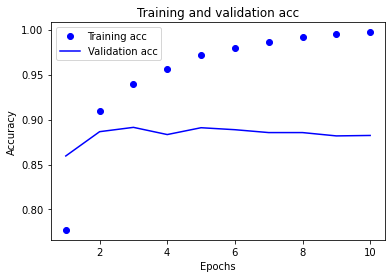

In [38]:
x_val, partial_x_train, y_val, partial_y_train, x_test, y_test = preprocess(25000)

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (25000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

history = train(model, 10, optimizer=optimizers.RMSprop(lr=0.001, momentum=0.15), loss='binary_crossentropy')
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])
plot_accuracy(history)

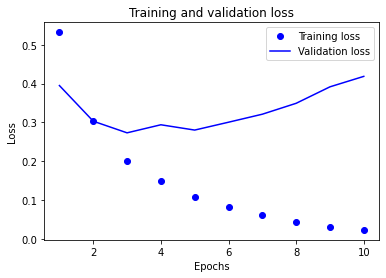

In [39]:
plot_loss(history)

Find the optimal epochs for the best network.

In [40]:
val_loss = history.history['val_loss']
optimal_epoch = np.argmin(val_loss)
print("Optimal epochs:", optimal_epoch)

Optimal epochs: 2


Train with the optimal epochs.

In [41]:
history = train(model, optimal_epoch, optimizer=optimizers.RMSprop(lr=0.001, momentum=0.15), loss='binary_crossentropy')
print("Accuracy at optimal epochs:", history.history['val_accuracy'][-1])

Accuracy at optimal epochs: 0.8802000284194946


## Evaluate on the test set

Evaluate the best network performance on the test set.

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 69s 88ms/step - loss: 0.5059 - accuracy: 0.8687


# Conclusions

## Evaluation

The obtained result yield an accuracy score of 0.8687, showing room for model improvement. At the same time, a series of experiments show that the results did not differ significantly, demonstrating the potential of a stable model as a predictor of movie reviews. In other words, further research on binary classification learning methods and the natural language-related dataset may help to improve the performance. For example, I might consider tuning for the dataset with 25000 words, instead of using 25000 words as the parameter and change it after tuned for 10000 words. Also, I might want to try combining unsupervised learning and supervised learning methods. For example, clustering the whole dataset with K=2 (i.e., positive and negative) without labels, add the results as an additional feature column, split the dataset, and then train with labels along with the feature column, so the network can also learn from the clustering results.

## Reproductivity


There may be some options to run this project in another network. For example, you may reproduce it as a clustering model using unsupervised learning. You can perform dimensional reduction and principal component analysis (PCA) to reduce dimensions, extract the essence of features, and run clustering with K=2 for grouping into negative and positive clusters. The benefits are that the network does not require labels and can perform even data is limited. It has more potential as a practical application as the real-world situation is often in a similar environment. The drawback is that performance may not be as promising as supervised learning due to the model characteristics.

# References

1. 9.210 IMDB. https://www.coursera.org/learn/uol-cm3015-machine-learning-and-neural-networks/ungradedLab/1nlzq/9-210-imdb